# Introduction: Study of Acoustic Losses in a Flute

This lab focuses on analyzing acoustic losses in a flute and their influence on playability. By modifying experimental conditions using a *stack* (straws inserted into the bore), we aim to better understand the mechanisms affecting sound generation and the acoustic properties of the instrument.

## Main Elements of Losses in a Flute

Acoustic losses in an instrument like the flute arise from several mechanisms, including:  
- **Viscous losses**: caused by air friction against the inner walls of the bore. These reduce transmitted energy and affect the quality of resonance.  
- **Thermal losses**: resulting from heat exchange between the moving air and the walls, leading to energy dissipation.  
- **Radiation losses**: when sound energy is dissipated as acoustic waves radiate out of the instrument at the open end.  

These phenomena directly impact the flute's sound characteristics, such as fundamental frequency, amplitude, and ease of vibration.

## Experimental Protocol

The experiment is carried out in two main phases:  

1. **Basic acoustic measurements with and without the stack**:  
   - **Pressure at the resonator entrance**: we evaluate the acoustic pressure generated by the player or an air generator.  
   - **Fundamental frequency**: we observe whether the *stack* modifies the instrument’s primary resonance frequency.  
   - **Sound wave amplitude**: we measure the intensity of the produced sound wave to assess losses related to the *stack*.  

2. **Acoustic impedance analysis**:  
   - Impedance is measured with and without the *stack* to identify changes in the resonator’s behavior.  
   - These measurements are also performed with and without the upper part of the flute (the section where air is introduced) to distinguish the impact of geometrical changes in the two configurations.

## Expected Outcomes

<p align="center">

<img width="500" src="./axialCelocityProfile.png"/>

</p>
This diagram illustrates the principle of the boundary layer.

For the flute without a stack, we can consider the case of large pipes. This allows the use of the formulas presented in the "Measurement Impedance" section below. The Stokes number which is the ratio of the width of loundary layer and pipe radius is large in this case.

However, for stacks, the large-pipe approximation cannot be assumed, as the Stokes number would be approximately 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

The impedance at the flute's input can be determined using the reduced impedance method.
Laminar flow is considered, and the characteristic thickness is significant.

# Measurement Impedance

The reduced impedance method can be used to achieve the desired results.
With these findings, the input impedance can be determined:

$\begin{aligned} & \left.\Gamma=\alpha+j \frac{\omega}{v_{\varphi}} \quad \text { où } \alpha=\frac{\omega}{c}\left[\frac{\alpha_1}{r_v}+\frac{\alpha_2}{r_v^2}\right] \quad \text { (avec } \alpha_1=1.044, \alpha_2=1.08\right) \\ & \frac{1}{v_{\varphi}}=\frac{1}{c}\left[1+\frac{\alpha_1}{r_v}\right]\end{aligned}$

$Z_c=\frac{\rho_0 c}{s}\left[1+\frac{\overline{\alpha_1}(1-j)}{r_v}-\frac{\overline{\alpha_2} j}{r_v^2}\right]$

For a conical tube, the relation of impedance follows

$\binom{P\left(x_1, \omega\right)}{U\left(x_1, \omega\right)}=\left(\begin{array}{cc}\cosh \Gamma\left(x_2-x_1\right) & Z_c \sinh \Gamma\left(x_2-x_1\right) \\ Z_c^{-1} \sinh \Gamma\left(x_2-x_1\right) & \cosh \Gamma\left(x_2-x_1\right)\end{array}\right)\binom{P\left(x_2, \omega\right)}{U\left(x_2, \omega\right)}$


In [58]:
config = {
    'data_folder': 'data/impedance mesure',
    'file_name': 'Impedance.txt',
}

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def get_local_maximas(data, frequences):
    """
    Identifies local maxima in the given data array and returns the maxima with their corresponding frequencies.
    Returns:
    tuple: A tuple of two numpy arrays:
        - maxima_values: Values of the local maxima in the data.
        - maxima_frequencies: Frequencies corresponding to the local maxima.
    """
    # Identify indices of local maxima
    maxima_indices = find_peaks(np.abs(data), distance = data.shape[0]/8)[0]
    # Get the corresponding maxima values and frequencies
    maxima_values = data[maxima_indices]
    maxima_frequencies = frequences[maxima_indices]
    
    return maxima_values, maxima_frequencies,maxima_indices
def get_local_minimas(data, frequences):
    # Same with minima
    minima_indices = find_peaks(-np.abs(data), distance = data.shape[0]/8)[0]
    # Get the corresponding maxima values and frequencies
    maxima_values = data[minima_indices]
    maxima_frequencies = frequences[minima_indices]
    
    return maxima_values, maxima_frequencies
def to_db(expr):
    return 20 * np.log(np.abs(expr))

In [60]:
## Test function to get local maximas

data = pd.DataFrame(columns=['Freq', 'Impedance'])

path = os.path.join(config['data_folder'], 'Flute', config['file_name'])
tmp = pd.read_csv(path, sep="\\s+", decimal=',', header=None)

data['Freq'] = tmp.iloc[:, 0]
data['Impedance'] = tmp.iloc[:, 1] + 1j * tmp.iloc[:, 2]

print(get_local_maximas(data['Impedance'].to_numpy(),data['Freq'].to_numpy()))

(array([69.65954196-23.35071533j, 27.24315648 +1.86061878j,
       14.43350351 +0.08856854j,  9.48864183 -0.41098432j,
        5.59698269 +1.91105619j]), array([ 443.4, 1335.2, 2228. , 3121.6, 3999.4]), array([ 1717,  6176, 10640, 15108, 19497]))


Text(0.5, 1.0, 'Impedance avec plus de frottement, rv/4')

<Figure size 1000x600 with 0 Axes>

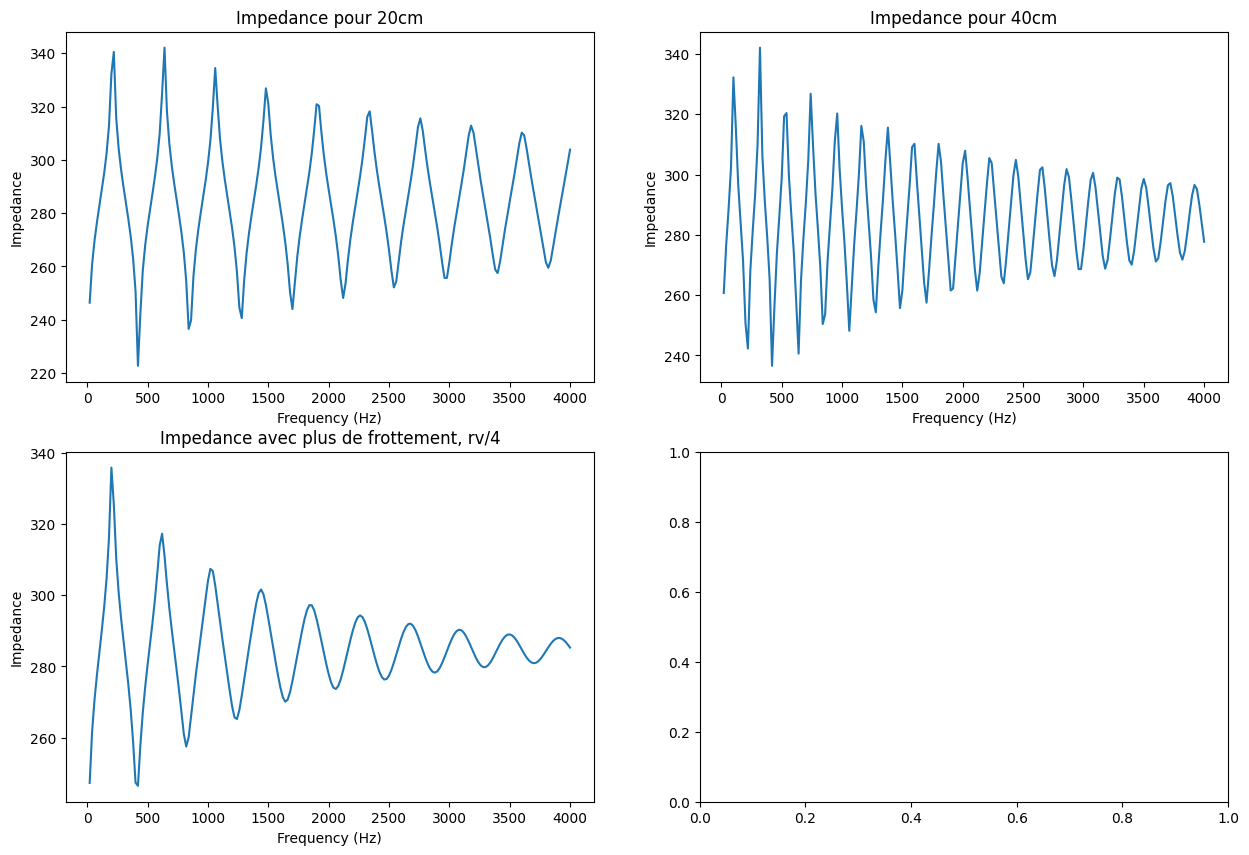

In [ ]:
import numpy as np

def characteristic_impedance(rho0, c, s, rv):
    Zc = (rho0 * c / s) * (
        1 + (0.37 * (1 - 1j) / rv) - (1.147 * 1j / rv**2)
    )
    return Zc

# Example usage
rho0 = 1.225  # Density of air in kg/m^3
c = 343  #  in m/s
s = 0.01  # Cross-sectional area in m^2
rv = 100.0  # Raynolds number
nbFreqs = 200
omega = np.linspace(20*2*np.pi,4000*2*np.pi,nbFreqs)  # pulsation en rad/s

Zc = characteristic_impedance(rho0, c, s, rv)

def propagation_constant(omega, c, rv):
    alpha = (omega / c) * (1.044 / rv + 1.08 / rv**2)
    omega_v_phi = omega / c * (1 + 1.044 / rv)
    gamma = alpha + 1j * omega_v_phi
    return gamma

def transfer_matrix(delta_x, gamma, Zc):
    M = np.array([
        [np.cosh(gamma * delta_x), Zc * np.sinh(gamma * delta_x)],
        [np.sinh(gamma * delta_x) / Zc, np.cosh(gamma * delta_x)]
    ])
    return M

x1 = 0
x2 = 0.40
s =(0.0189/2)**2*np.pi
delta_x = x2-x1
P_x2 = 10000
U_x2 = 100

def calculate_impedance(P_x2, U_x2, delta_x,omega,c,rv,s,rho0):
    # Calculate gamma and Zc
    gamma = propagation_constant(omega, c, rv)
    Zc = characteristic_impedance(rho0, c, s, rv)

    # Initialize P_x1 and U_x1 arrays
    P_x1 = np.zeros(len(omega), dtype=complex)
    U_x1 = np.zeros(len(omega), dtype=complex)

    # Compute P_x1 and U_x1 for each frequency
    for i in range(len(omega)):
        M = transfer_matrix(delta_x, gamma[i], Zc)
        vec_x2 = np.array([P_x2, U_x2])
        vec_x1 = M @ vec_x2
        P_x1[i] = vec_x1[0]
        U_x1[i] = vec_x1[1]
    return np.abs(P_x1)/np.abs(U_x1)

# Plot the results
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0,0].plot(omega / (2 * np.pi),to_db(calculate_impedance(P_x2, U_x2, delta_x,omega,c,rv, s, rho0)), label="|P/U|")
ax[0,0].set_xlabel("Frequency (Hz)")
ax[0,0].set_ylabel("Impedance")
ax[0,0].set_title("Impedance pour 20cm")
ax[0,1].plot(omega / (2 * np.pi),to_db(calculate_impedance(P_x2, U_x2, delta_x*2,omega,c,rv, s, rho0)), label="|P/U|")
ax[0,1].set_xlabel("Frequency (Hz)")
ax[0,1].set_ylabel("Impedance")
ax[0,1].set_title("Impedance pour 40cm")
ax[1,0].plot(omega / (2 * np.pi),to_db(calculate_impedance(P_x2, U_x2, delta_x,omega,c,rv/4, s, rho0)), label="|P/U|")
ax[1,0].set_xlabel("Frequency (Hz)")
ax[1,0].set_ylabel("Impedance")
ax[1,0].set_title("Impedance avec plus de frottement, rv/4")


These simulations show the theoretical influence of the parameters. More friction reduces the height of resonance frequencies, and longer tubes increase the number of peaks. We can now measure the resonance frequencies.

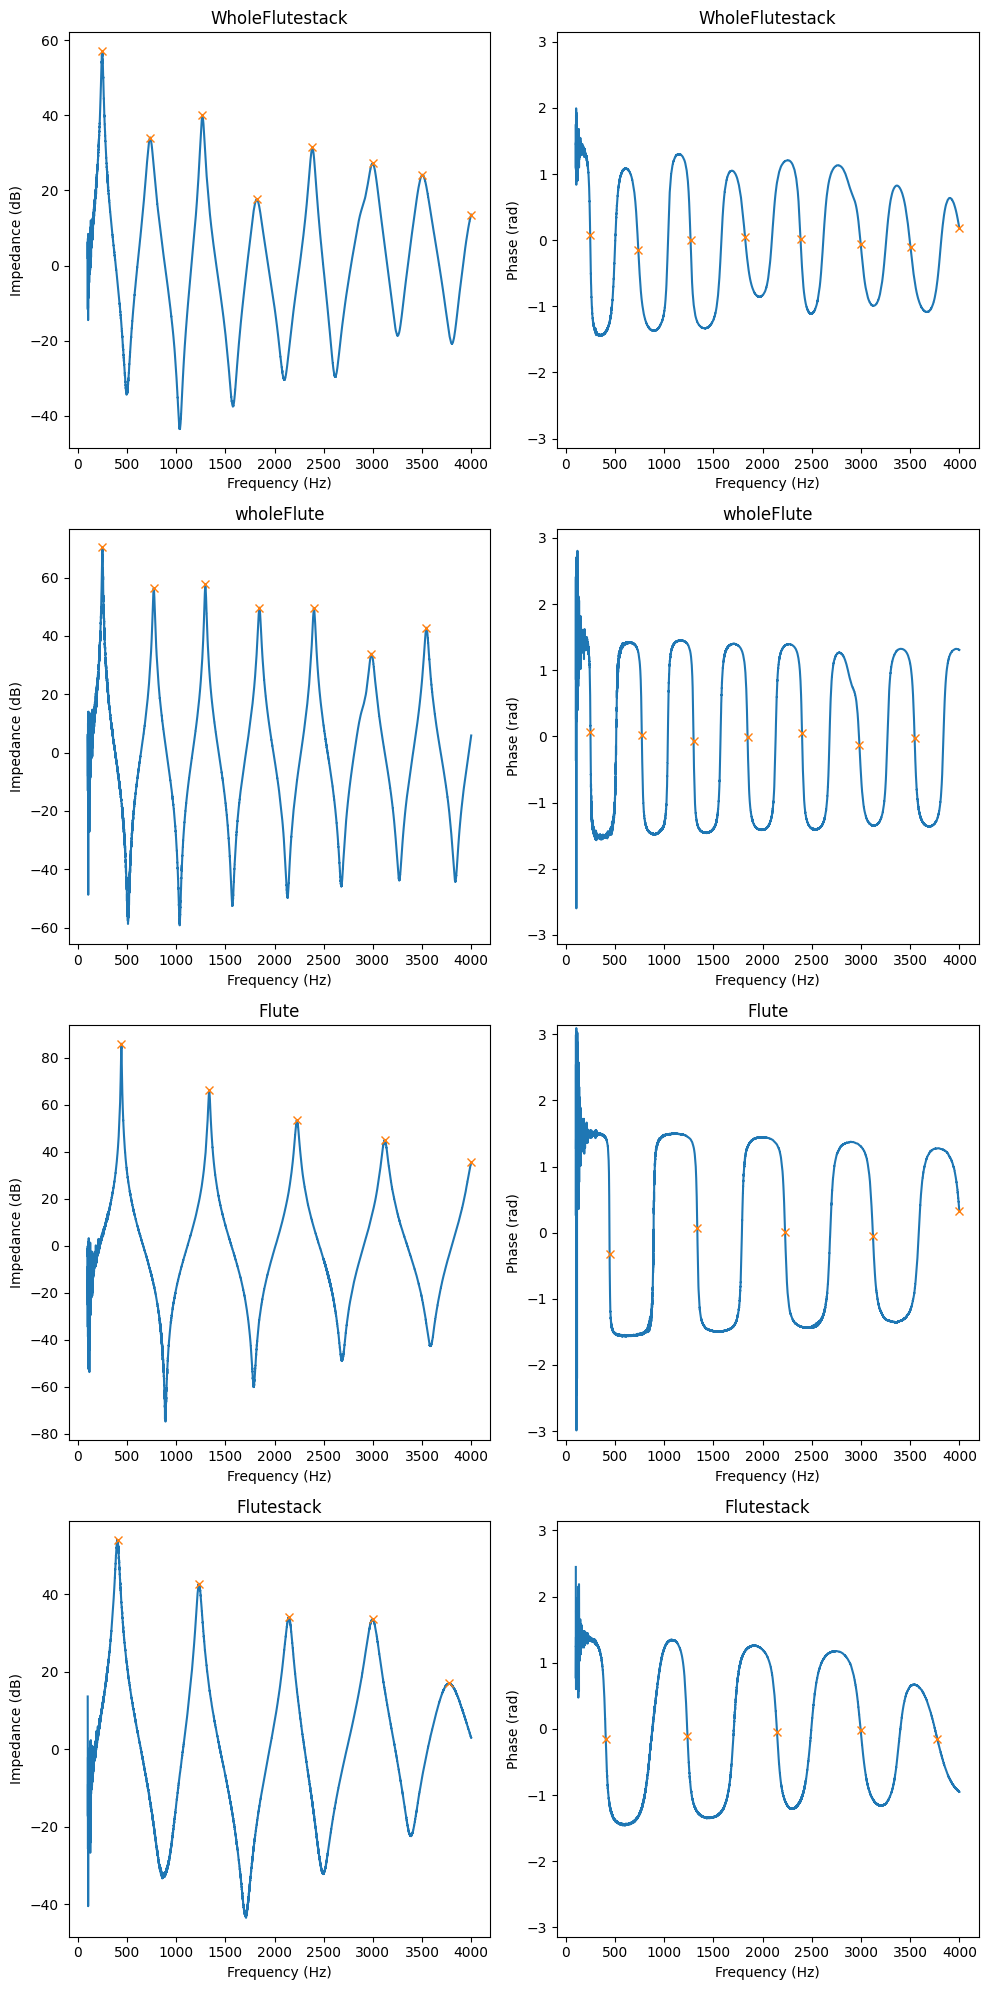

In [11]:
subfolders = [f for f in os.listdir(config['data_folder']) if os.path.isdir(os.path.join(config['data_folder'], f))]

N_fig = len(subfolders)
fig, ax = plt.subplots(N_fig, 2, figsize=(10, 5 * N_fig))

data = pd.DataFrame(columns=['Freq', 'Impedance'])

for idx, subfolder in enumerate(subfolders):
    path = os.path.join(config['data_folder'], subfolder, config['file_name'])
    tmp = pd.read_csv(path, sep="\\s+", decimal=',', header=None)

    data['Freq'] = tmp.iloc[:, 0]
    data['Impedance'] = tmp.iloc[:, 1] + 1j * tmp.iloc[:, 2]


    # ax[idx, 0].plot(data['Freq'], np.abs(data['Impedance']))
    ax[idx, 0].plot(data['Freq'], to_db(data['Impedance']))
    ax[idx, 0].set_title(subfolder)
    ax[idx, 0].set_xlabel('Frequency (Hz)')
    ax[idx, 0].set_ylabel('Impedance (dB)')

    max_values,  max_freq, max_indices = get_local_maximas(data['Impedance'],data['Freq'])
    ax[idx, 0].plot(max_freq, to_db(max_values), "x")

    ax[idx, 1].plot(data['Freq'], np.angle(data['Impedance']))
    ax[idx, 1].set_title(subfolder)
    ax[idx, 1].set_xlabel('Frequency (Hz)')
    ax[idx, 1].set_ylabel('Phase (rad)')
    ax[idx, 1].set_ylim(-np.pi, np.pi)
    ax[idx, 1].plot(max_freq, np.angle(data['Impedance'][max_indices]), "x")



plt.tight_layout()
plt.show()


We can see that, despite the stack, the impedance has the same mathematical form, and can therefore be expressed by the model, even if the hypothesis concerning the number of Stacks was no longer verified. The flow remains laminar with the stack.

We note that adding the flute nozzle increases the number of peaks. This is because the length of the pipe is increased, as the model predicted.
What's more, the amplitude of the resonances is reduced with the stacks. This was what the model predicted. We also note that the peaks do not follow an exponential decay exactly as in the model. This may be due to the radiation impedance not implemented here.

The peaks correspond to a phase change at 0.

# bifurcation

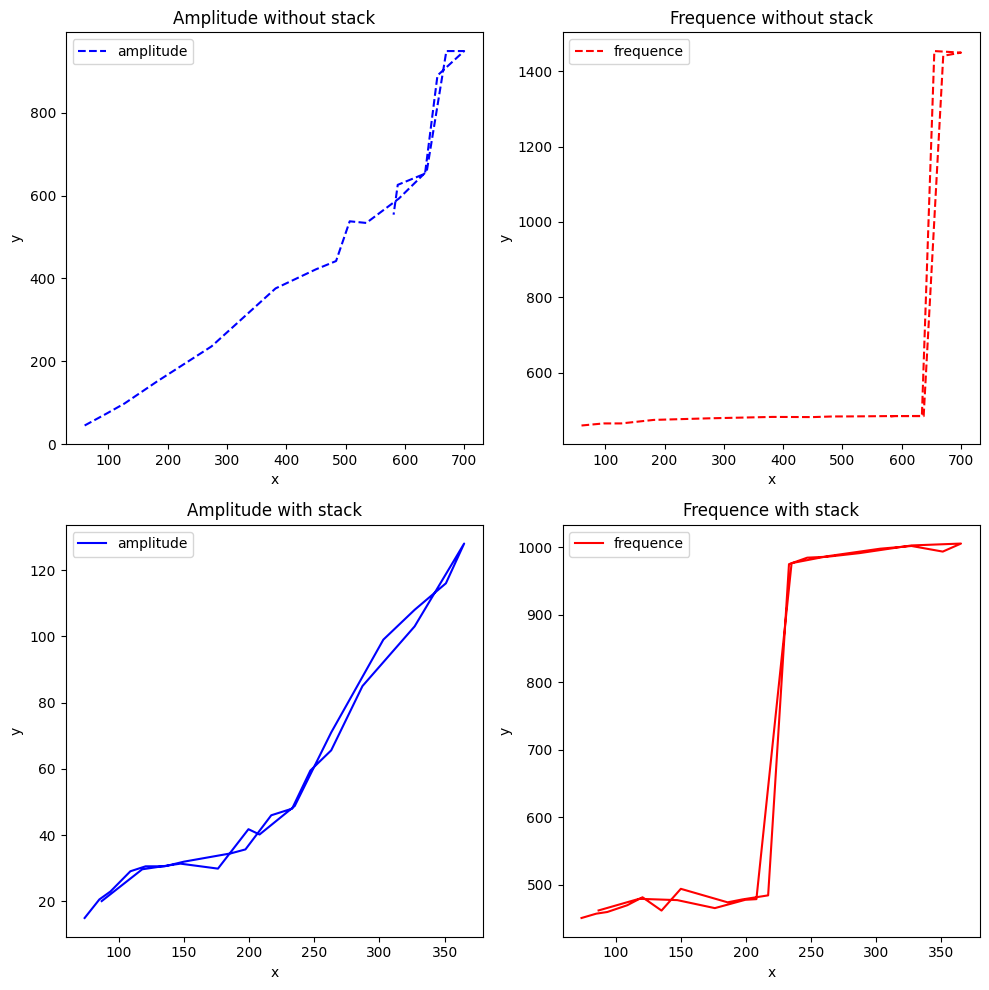

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
with_stack_path = "./data/bifurcation_mesure/bifurcation_data_with_stack.csv"
with_stack_data = np.genfromtxt(with_stack_path, delimiter=";").T
with_stack_pressure = with_stack_data[0]
with_stack_ampls = with_stack_data[1]
with_stack_freqs = with_stack_data[2]


without_stack_path = "./data/bifurcation_mesure/bifurcation_data_without_stack.csv"
without_stack_data = np.genfromtxt(without_stack_path, delimiter=";").T
without_stack_pressure = without_stack_data[0]
without_stack_ampls = without_stack_data[1]
without_stack_freqs = without_stack_data[2]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 1 row, 2 columns

# Left plot
axes[0,0].plot(without_stack_pressure, without_stack_ampls, '--', label='amplitude', color='blue')
axes[0,0].set_title('Amplitude without stack')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].legend()

# Right plot
axes[0,1].plot(without_stack_pressure, without_stack_freqs, '--', label='frequence', color='red')
axes[0,1].set_title('Frequence without stack')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].legend()

# Left plot
axes[1,0].plot(with_stack_pressure, with_stack_ampls, '-', label='amplitude', color='blue')
axes[1,0].set_title('Amplitude with stack')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].legend()

# Right plot
axes[1,1].plot(with_stack_pressure, with_stack_freqs, '-', label='frequence', color='red')
axes[1,1].set_title('Frequence with stack')
axes[1,1].set_xlabel('Debit')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


The amplitude does not increase linearly with air flow. This is due to the progressive change in timbre of the flute. Some frequency amplitudes decrease while others increase, and this kind of phenomenon occurs.


<img src="./Capture d’écran 2024-12-02 à 20.57.50.png" alt="Capture d’écran" width="400">
<img src="./Capture d’écran 2024-12-02 à 20.58.37.png" alt="Capture d’écran" width="400">

In these bifurcation diagrams, the increase in losses correlates with the lowering of the bifurcation frequency. A small Histeeresis is observed for the stack experiment. The stack increases friction, which is a non-linear phenomenon, so the histeresis is a little greater.